# Kapitel 11 - Logistic Regression als simples Neuronales Netz

## 11.1. Kapitelübersicht <a class="anchor" id="11-1"/>

Bevor wir uns mit der Implementierung von Neuronalen Netzen in Keras widmen, werden wir in diesem Kapitel das Klassifizierungsverfahren <b>Logistic Regression</b> als Neuronales Netz implementieren. Der eigentliche <a href="https://github.com/Kulbear/deep-learning-coursera/blob/master/Neural%20Networks%20and%20Deep%20Learning/Logistic%20Regression%20with%20a%20Neural%20Network%20mindset.ipynb">Code</a> wurde aus dem Coursera Kurs "Deep Learning" entnommen. Dort wurde in der ersten <a href="https://github.com/Kulbear/deep-learning-coursera/blob/master/Neural%20Networks%20and%20Deep%20Learning/Logistic%20Regression%20with%20a%20Neural%20Network%20mindset.ipynb">Programmieraufgabe</a> ein Datensatz mit Katzenbildern klassifiziert, wobei Bilder die Klassen "Katze" oder "Keine Katze" besaßen. Logistic Regression wurde dort als einfaches simples Neuronales Netz interpretiert. Der Code funktioniert sehr gut mit unserem Korpus, jedoch musste dieser vorher auf zwei Kategorien reduziert werden, da eine Multiclass Klassifizierung als Anschauungsbeispiel zu komplex wäre. Die Idee dieses Kapitels ist es, einen Einblick in die Implementation eines Neuronalen Netzes zu erhalten. Neben einem Einblick soll dieses Kapitel die Grundschritte der Neuronalen Netze wie Forward Propagation und Backward Propagation verdeutlichen(?). Später werden wir auf die Deep-Learning-Bibliothek <b>Keras</b> zurückgreifen, bei der jedoch die zentralen Schritten des Trainings eines Neuronalen Netzes nicht so präsent sind. 

<b>Abschnittsübersicht</b><br>

[11.1. Kapitelübersicht](#11-1)<br>


Am Ende dieses Kapitel werden wir folgende Themen behandelt und/oder vertieft haben:
- Implementierungen Neuronaler Netze in numpy

## ?.2. Reduzierung des Korpus auf 2 Klassen

Um unser Korpus mit dem später entwickelten binären Classifier trainieren zu können, müssen wir es auf zwei Klassen reduzieren. Dazu wählen wir die Kategorien "Computerspiel nach Plattform" und "Internet" aus.

#### Laden und Reduzierung des Korpus

In [3]:
import pandas as pd
corpus = pd.read_csv("tutorialdata/corpora/wikicorpus_v2.csv", index_col=0)

In [4]:
corpus_computer = corpus[corpus.category == "Computerspiel nach Plattform"]
corpus_internet = corpus[corpus.category == "Internet"]
tinycorpus = corpus_computer.append(corpus_internet, ignore_index=True)
tinycorpus

,id,category,length,text
0,2646,Computerspiel nach Plattform,353,Ballyhoo ist ein Computerspiel der US-amerikan...
1,2644,Computerspiel nach Plattform,379,Balance of Power ist ein Computer-Strategiespi...
2,2645,Computerspiel nach Plattform,415,Ballblazer ist ein Zweispieler-Computer-Sports...
3,2647,Computerspiel nach Plattform,417,Barbarian : The Ultimate Warrior und Barbarian...
4,2652,Computerspiel nach Plattform,359,Beyond Zork ( kompletter Titel Beyond Zork : T...
5,2649,Computerspiel nach Plattform,445,BattleTech : The Crescent Hawk ' s Inception i...
6,2650,Computerspiel nach Plattform,1188,Battletoads ist ein Videospiel des Spieleentwi...
7,2651,Computerspiel nach Plattform,1008,"Beneath a Steel Sky ( Deutsch etwa "" Unter ein..."
8,2643,Computerspiel nach Plattform,344,"Badlands ist ein Arcadespiel , das Atari Games..."
9,2648,Computerspiel nach Plattform,1338,Battle Isle ist eine Reihe von rundenbasierten...


#### Aufteilung in Trainings- und Testdatensätze

Ein wichtige Veränderung ist hier die Umwandlung der Sparse Matrix `vector` in eine Dense Matrix. Dies erfolgt mit `toarray()`. Ohne diese würde das Neuronale Netz nicht arbeiten können (der erste Fehler würde schon bei der Implementierung der Sigmoid-Funktion erfolgen).

In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np


labels = LabelEncoder().fit_transform(tinycorpus["category"])
vector  = TfidfVectorizer().fit_transform(tinycorpus["text"]).toarray()


X_train, X_test, y_train, y_test = train_test_split(vector, 
                                                    labels, 
                                                    test_size=0.2, 
                                                    train_size=0.8,
                                                    random_state=42)

#### Umformung der Trainingsdatensätze

Eines der häufigsten Fehler, die bei der Arbeit mit Neuronalen Netzen gemacht wird, ist die falsche Benutzung von Matrix- und Vektordimensionen. Schauen wir uns die Dimensionen der Trainings- und Testdatensätze an. 

In [36]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 31654)
(80, 31654)
(320,)
(80,)


`X_train` hat die Dimension `(320, 31654)`. Diese hat die Form `(n,m)`, wobei `n` für die Anzahl der Zeilen und `m` für die Anzahl der Spalten steht. Die Matrix hat also 320 Zeilen und 31654 Spalten. Um unser Modell nutzen zu können, muss jede Spalte einen Datensatz repräsentieren. Bis jetzt repräsentiert jedoch die Zeilen einen Datensatz, weshalb wir die Matrix <u>transponieren</u> (= Zeilen werden zu Spalten und umgekehrt) müssen. Dies können wir mit `.T` machen. Da die Testdatensätze eindimensionale Matrizen, also Vektoren sind, müssen wir diese nicht transponieren.

In [82]:
X_train = X_train.T
X_test = X_test.T

In [83]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(31654, 320)
(31654, 80)
(320,)
(80,)


## ?.3. Implementierung des Neuronalen Netzes

Wir werden nun Logistic Regression als simples Neuronales Netz mit numpy implementieren. Dazu brauchen wir nur fünf Funktionen. Diese werden ausführlich erklärt.

### ?.3.1. Die Sigmoid-Funktion

Wie wir in Kapitel 6 gesehen haben, basiert Logistic Regression auf der <b>Sigmoid-Funktion</b> (oder <b>Logistische Funktion</b>). Diese wandelt jeden Eingabewert in eine Zahl zwischen 0 und 1 um.<br>

$ f(x) = \frac{1}{1\ +\ e^{-x}}$<br>

In [52]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [57]:
print(sigmoid(10))
print(sigmoid(0.001))

0.9999546021312976
0.5002499999791666


In [58]:
sigmoid(vector)

array([[0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       ...,
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5]])

Die Implementation ist ziemlich simpel. Bereits hier zeigt sich jedoch, wieso wir die Daten gerne als Dense-Matrix vorliegen hätten. Versuchen wir nun einmal, die Daten als Sparse Matrix zu übergeben.

In [60]:
sparse_vector  = TfidfVectorizer().fit_transform(tinycorpus["text"])
sigmoid(sparse_vector)

AttributeError: exp not found

Wir erhalten eine Fehlermeldung, da die numpy-Funktion `exp` nicht mit Sparse Matrizen arbeiten kann.

### ?.3.2. Parameterinitalisierung mit Nullen

Als nächstes müssen wir die Parameter `w` und `b` mit Nullen initalisieren. Dafür müssen wir jedoch zunächst klären, was `w` und `b` überhaupt sind. Schauen wir uns noch einmal die Formel für Logistic Regression aus Kapitel 6 an:<br>

$ y = \frac{e^{(B0\ +\ B1 \cdot x)}}{1\ +\ e^{(B0\ +\ B1 \cdot x)}}$<br>

Diese Formel ist eine Erweiterung der Formel für <b>Linear Regression</b>, die folgendermaßen aussieht:<br>

$ y = B0 + B1 \cdot x $<br>

$y$ war der Output, der vorausgesagt werden soll und $x$ der Input. $B0$ war der Bias Koeffizient und $B1$ der Koeffizient für $x$. Diese Formel kann auch etwas anders geschrieben werden:<br>

$ y = w^T \cdot x\ +\ b $<br>

$b$ ist hier der Biaskoeffizient $B0$. $B1$ wird durch eine transponierte Gewichtsmatrix $w$ repräsentiert. Wie in Kapitel 6 sind diese Koeffizienten die Werte, die vom unseren Modell erlernt werden. In Kapitel 6 hatten wir diesen Lernprozess ausgeblendet, in diesem Kapitel werden wir genauer auf ihn eingehen, doch dazu später mehr (AF?). Die Formel ist nun aber die Formel für die Lineare Regression. Die Formel für die Logistic Regression sieht folgendermaßen aus:<br>

$ y = \frac{e^{(w^T \cdot x\ +\ b)}}{1\ +\ e^{(w^T \cdot x\ +\ b)}}$<br>


Etwas allgemeiner können wir die Formel folgendermaßen formulieren ($\sigma$ steht für Sigmoid-Funktion):<br>

$ y = \sigma(w^T \cdot x\ +\ b) $<br>

$\sigma$ ist eine sogenannten <b>Aktivierungsfunktion</b>. Neben der Sigmoid-Funktion hatten wir noch die <b>Softmax-Funktion</b> als Aktivierungsfunktion für <b>Multinomial Logistic Regression</b> kennengelernt. Noch allgemeiner könnten wir die Funktion folgendermaßen schreiben, wobei $a$ für eine beliebige Aktivierungsfunktion steht.

$ y = a(w^T \cdot x\ +\ b) $<br>

Diese Formel wird in jedem Neuron unseres Neuronalen Netzwerks angewendet. Graphisch können wir uns das folgendermaßen vorstellen, wobei $a$ die Aktivierungsfunktion ist und $y$ die Funktion:

<img src="tutorialdata/img/nn4_2_edit.png" alt="Neural Network with 2 layers and Neuron labeling" align="center" width="600px;"><br>

`w` und `b` sind also Koeffizienten, die mithilfe eines Neuronalen Netzes erlernt werden. Jedoch müssen wir mit irgendwelchen Werten beginnen, weshalb wir sie hier mit Nullen initalisieren. `b` können wir dabei einfach gleich Null setzen, da bei ein Skalar (= einzelner Wert) ist. `w` ist jedoch kein Skalar, sondern ein Vektor, dessen Länge bzw. Dimension wir mit `dim` angeben.

In [61]:
def initialize_with_zeros(dim):
    w = np.zeros(shape=(dim, 1))
    b = 0

    return w, b

In [77]:
print(initialize_with_zeros(320))

(array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]

Wir werden später dieser Funktion `dim = 320` übergeben, da wir für jeden Trainingsdatensatz einen Eintrag mit einer Null erstellen wollen.

In [80]:
#initialize_with_zeros(320)

### ?.3.3. Forward und Backward propagation

Nun haben wir unsere Gewichte `w` und `b` initalisiert. Diese müssen jedoch angepasst werden, damit unser Modell sinnvolle Repräsentation liefert. Würden wir sie nicht verändern, würden unsere Ergebnisse immer gleich bleiben und unser Modell wäre sinnlos. Das Modell muss die Gewichte `w` und `b` also <u>lernen</u>. Dieses findet in der sogenannten <b>Trainingsschleife</b> (englisch: training loop) statt. Diese lässt sich am beste mit der folgenden Grafik beschreiben:<br>

<img src="tutorialdata/img/neuronal_network.png" alt="Neuronal network" align="center" width="300px;"><br><div style="text-align: center; font-size:10px;">CHOLLET, Francois, Deep Learning mit Python und Keras, übers. von Knut LORENZEN, New York 2018, S. 31.</div></img>

Zuerst geben wir unsere Daten ein (<b>Eingabe X</b>). Dies ist eine Matrix, bei der jede Spalte für ein Trainingsbeispiel steht. In unserem Fall sind die 320 Spalten für 320 Trainingsbeispiele. Unser Input Layer hat also 320 Dimension, also auch 320 Neuronen. Nun bestimmten wir `w` und `b`, am Anfang noch mit Nullen oder zufälligen Werten. Das Ergebnis ist die Funktion $y$. Diese leiten wir an unsere Neuronen weiter, wo sie in eine Aktivierungsfunktion gesteckt(?) werden. Das können wir hier sehen:<br>
<img src="tutorialdata/img/nn4_2_edit.png" alt="Neural Network with 2 layers and Neuron labeling" align="center" width="400px;">

Am Ende dieses Durchlaufs erhalten wir eine Voraussage $\hat{Y}$ (bis jetzt nannten wir dies `y_pred`). Stimmt diese mit den tatsächlichen Label $Y$ überein, hat unser Modell das Label richtig vorausgesagt. Zu Beginn ist es jedoch sehr unwahrscheinlich, dass unser Modell mit zufälligen Gewichten oder Gewichten bestehend aus Nullen das richtige Label voraussagt. Wir müssen also berechnen, wie sehr das Modell mit der Voraussage falsch gelegen hat. Dies wird mit der <b>Loss Function</b> (deutsch: <b>Verlustfunktion</b>) berechnet. Eine Loss Function berechnet jedoch nur den <b>Loss score</b> (deutsch: Verlustscore) von einem einzigen Trainingsbeispiel. Um die Loss scores aller Trainingsbeispiele zu berechnen, brauchen wir eine <b>Cost Function</b>, die den Durschnitt aller Loss scores für den gesamten Trainingsdatensatz berechnet.<br> Dieser gesamte Schritt wird <b>Forward Propagation</b> gennant. Eine gute Visualisierung bietet diese <a href="https://www.youtube.com/watch?v=UJwK6jAStmg">Video</a>.<br>

Anhand des Loss scores können nun die Koeffizienten `w` und `b` aktualisiert werden. Diesen Vorgang nennt man <b>Backward Propagation</b>. Wie genau diese Backward Propagation funktioniert, wird in Chollets Buch Kapiteln 2.4.1 - 2.4.4 sehr gut erklärt. MEHR STEIGUNG

In [95]:
X_train.shape[1]

320

Nun jedoch zur Funktion `propagate`. Sie nimmt als Input die Gewichtsmatrix `w`, den Biaskoeffizienten `b`, die Trainingsdaten `X_train` und die Trainingslabel `Y_train`. Wir bestimmten zunächst die Anzahl der Trainingsbeispiele `m`. Danach berechnen wir die Aktivierungsfunktion `A`. Nach dem ersten Aufruf sind die Matrix `A` folgendermaßen aus:

In [109]:
w, b = initialize_with_zeros(X_train.shape[0])
A = sigmoid(np.dot(w.T, X_train) + b)
A

array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5

Wir brauchen nun also eine Cost Function, die den Loss score für alle Trainingsbeispiele berechnet. Die Auswahl der Loss Function bzw. der Cost Function hängt von der jeweiligen Klassifizierung ab:
- <b>binary cross entropy</b> für binäre Klassifizierung
- <b>cross entropy</b> für Multiclass Klassifizierung

Da wir hier eine binäre Klassifikation durchführen, verwenden wir die <b>binary cross entropy</b>. Die Formel dafür lautet: <br>

$ \text{binary cross entropy} = - (y\ \cdot log(\hat{y}) + (1−y)\ \cdot log(1−\hat{y}))$

<div class="alert alert-warning">
<b>Aufgabe:</b> Cross entropy
    
Cross entropy ist uns in einer anderen Form bereits in Kapitel 6 begegnet und zwar in Form der <b>Maximum likehood estimation</b>-Methode. Lesen Sie den <a href="https://machinelearningmastery.com/loss-and-loss-functions-for-training-deep-learning-neural-networks/">Blog-Eintrag</a> von Jason Brownlee zu <b>Cross entropy</b>. Schauen Sie sich danach die Formel für <b>binary cross entropy</b> an:<br>
    
$ \text{binary cross entropy} = - (y\ \cdot log(\hat{y}) + (1−y)\ \cdot log(1−\hat{y}))$<br>

$y$: das wahre Label<br>
$\hat{y}$: das vorgesagte Label<br>

Setzen Sie folgende Werte für $y$ und $\text{y}$ ein. Was beobachten Sie? Gehen Sie davon aus, dass $log(0)$ berechnet werden kann und $log(0) = -14$. <i>Tipp</i>: $log(1) = 0$.<br>

a) $y = 0$; $\hat{y} = 0$<br>
b) $y = 1$; $\hat{y} = 1$<br>
c) $y = 0$; $\hat{y} = 1$<br>
d) $y = 1$; $\hat{y} = 0$<br>

Die Loss Function für binary cross entropy ist:<br>

$ L(\hat{y}, y) = - (y\ \cdot log(\hat{y}) + (1−y)\ \cdot log(1−\hat{y}))$.<br><br>

Die Formel für die Cost Function ist:<br>

$ J(w, b) = -\frac{1}{m} \sum_{i=1}^m \cdot\ L(\hat{y}, y) \\ 
= -\frac{1}{m} \sum_{i=1}^m \cdot\ (y^{(i)}\ \cdot log(\hat{y}^{(i)}) + (1−y^{(i)})\ \cdot log(1−\hat{y}^{(i)}))$.<br><br>

Diese wird in der Funktion `propagate` in der Variable `cost` gespeichert. (TODO np.squeeze?) Damit sind wir mit der Forward Propagation fertig. Nun implementieren wir die partielle Ableitungen für `w` und `b` (TODO: warum nicht genauer!). Die Formeln dafür lauten folgendermaßen:<br>


$ \frac{\partial J}{\partial w} = \frac{1}{m}\text{X_train}\ \cdot(A-\text{Y_train})^T$<br>

$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m \cdot\ (a^{(i)}-y^{(i)})$<br>

Diese speichern wir im Dictionary `grads`.

In [110]:
def propagate(w, b, X_train, Y_train):
   
    # m: Anzahl der Trainingsbeispiele
    m = X_train.shape[1]
    
    ### Forward Propagation ###
    
    # Aktivierungsfunktion / Formel für Logistic Regression
    A = sigmoid(np.dot(w.T, X_train) + b) 
    
    # Cost Function
    cost = (- 1 / m) * np.sum(Y_train * np.log(A) + (1 - Y_train) * (np.log(1 - A)))
    cost = np.squeeze(cost)
    
    
    ### Backward Propagation ###
    
    dw = (1 / m) * np.dot(X_train, (A - Y_train).T)
    db = (1 / m) * np.sum(A - Y_train)


    grads = {"dw": dw,
             "db": db}

    
    return grads, cost

### ?.3.4. Optimierung

Wir haben nun mit `propagate` eine Funktion implementiert, die Forward und Backward Propagation implementiert. Jetzt müssen wir die `optimize` Funktion implementieren, die für mehrere Dinge verantwortlich ist:
- Optimieren über mehrere Iterationen (durch `num_iterations`). Eine Iteration ist ein Durchlaufen der Trainingsschleife.
- Aktualisierung von `w` und `b` mithilfe einer <b>Learning Rate</b> (deutsch: Lernrate). Diese Learning Rate ist ein Hyperparameter, der angibt, wie sehr wir die Gewichtsmatrix `w` und den Bias-Koeffizienten `b` in unserem Neuronalen Netz anpassen wollen.
- Dokumentation des Cost-Wertes alle hundert Iterationen.
- Ausgabe des Cost-Wertes alle hundert Trainingsbeispiele. Dies kann über `print_cost` gesteuert und "abgeschaltet" werden.
- Speicherung von `w` und `b` in einem Parameter-Dictionary `params`, nachdem die Iterationen abgeschlossen sind.

In [102]:
def optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost = False):

    costs = []
    
    for i in range(num_iterations):

        grads, cost = propagate(w, b, X_train, Y_train)

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        
        # Aktualisierung von w und b
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        # Dokumentiert die costs in einer Liste
        if i % 100 == 0:
            costs.append(cost)
        
        # Bei jedem 100ten Trainingsbeispiel wird die cost ausgegeben
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

### ?.3.5. Voraussage

Zuletzt muss noch eine `predict`-Funktion implementiert werden, die wie die `predict`-Funktion von <b>Scikit learn</b> funktioniert. Wie Voraussagen mithilfe von Logistic Regression berechnet werden, hatten wir uns bereits in Kapitel 6.3.2 angeschaut. Alle Werte unserer Matrix `A`, die größer als $0.5$ sind, werden zu einer $1$ umgewandelt und alle anderen Werte zu einer $0$.

In [103]:
def predict(w, b, X_train):
    
    m = X_train.shape[1]
    y_pred = np.zeros((1, m))
    w = w.reshape(X_train.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X_train) + b)
    
    for i in range(A.shape[1]):
        y_pred[0, i] = 1 if A[0, i] > 0.5 else 0
    
    
    return y_pred

### ?.3.6. Das Modell

Zuletzt werden alle Funktionen zusammengeführt in der Funktion `lr_model` zusammengeführt.

In [113]:
def lr_model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):

    w, b = initialize_with_zeros(X_train.shape[0])

    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    model = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return model

In [116]:
model = lr_model(X_train, 
          y_train, 
          X_test, 
          y_test, 
          num_iterations = 2000, 
          learning_rate = 0.1, 
          print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.660603
Cost after iteration 200: 0.630567
Cost after iteration 300: 0.602745
Cost after iteration 400: 0.576946
Cost after iteration 500: 0.552993
Cost after iteration 600: 0.530725
Cost after iteration 700: 0.509992
Cost after iteration 800: 0.490660
Cost after iteration 900: 0.472607
Cost after iteration 1000: 0.455722
Cost after iteration 1100: 0.439904
Cost after iteration 1200: 0.425065
Cost after iteration 1300: 0.411122
Cost after iteration 1400: 0.398001
Cost after iteration 1500: 0.385638
Cost after iteration 1600: 0.373970
Cost after iteration 1700: 0.362945
Cost after iteration 1800: 0.352514
Cost after iteration 1900: 0.342631
train accuracy: 99.6875 %
test accuracy: 98.75 %


Nun visualisieren wir den Lernverlauf.

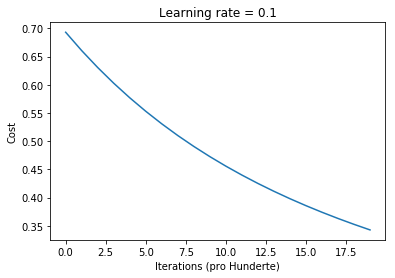

In [125]:
import matplotlib.pyplot as plt

costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('Cost')
plt.xlabel('Iterations (pro Hunderte)')
plt.title("Learning rate = " + str(d["learning_rate"]))
plt.show()

Umso länger wir trainierten, umso geringer wurde der Cost score.

<div class="alert alert-warning">
<b>Aufgabe:</b> Anspassung der Learning Rate und Iterationenanzahl
    
Probieren Sie Werte für die Learning Rate aus und passen sie die Iterationenanzahl beliebig an. Visualiseren Sie für jede Anpassung und vergleichen Sie die Graphen.

## ?.? Mögliche Fehler

- Fehlercode mit "sparse" in der Beschreibung → Daten wurden nicht mithilfe von `toarray()` in eine Dense Matrix transformiert.